In [1]:
import warnings
import torch

from gflownet.config import init_empty, Config
from rdkit.Chem.Draw import MolsToGridImage
import pathlib

In [2]:
from molecule import MoleculeTrainer

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


Run the model with comparing openpom probability vectors as reward

In [3]:
import pandas as pd
import random
import datetime

In [4]:
# Get vanilla molecules

df = pd.read_csv("data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [5]:
len(df)*0.01

49.83

In [6]:
vanilla_mols_df = df.loc[df['vanilla'] == 1]
vanilla_mols_df.head()
#vanilla = index 64


,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26,COc1ccccc1O,medicinal;savory;phenolic;woody;smoky;vanilla;...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32,O=C1CCc2ccccc2O1,herbal;nutty;vanilla;coumarinic;hay;tobacco;sw...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64,COc1cc(C=O)ccc1O,chocolate;vanilla;creamy;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
67,COc1cc(C(C)=O)ccc1O,vanilla;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
vanilla_mols_df.loc[4]

nonStereoSMILES                                       O=Cc1ccc(O)cc1
descriptors        phenolic;woody;nutty;vanilla;hay;metallic;swee...
alcoholic                                                          0
aldehydic                                                          0
alliaceous                                                         0
                                         ...                        
warm                                                               0
waxy                                                               0
weedy                                                              0
winey                                                              0
woody                                                              1
Name: 4, Length: 140, dtype: object

In [8]:
import numpy as np
a = np.array(vanilla_mols_df.index)
random.shuffle(a)
a


array([4703, 2320, 2498, 4071,  633,   85, 1835,  179,  959, 1006,  387,
       4638,  150, 2018, 1563, 2450,  392, 3903,   32, 2492,  155,  163,
       1184, 2725,  170,  398,  403, 1884, 4951,  944, 1024, 2419, 4564,
       2844,   67,  399, 4068, 1970, 3000, 2491, 4356, 2386, 2193, 1862,
        211,  634, 1740, 4272,    4, 2250, 1297,  547, 2486, 3904, 4563,
       3730, 3020,  201, 2456, 1103,  390,  389, 4185, 4899, 4866, 3039,
        212, 1721, 1933, 1473, 4337,  731,  738, 1140, 2938, 2845, 1789,
        844, 2901, 2288, 3154,   64, 1370,  396, 4651, 1985, 2802,  777,
        395,   26, 1003, 2525, 4419,  719,  696,  393,  243,  532, 2849,
        835,  447,  928, 1779, 1162,  448,  254, 1474, 1119, 2261, 1174,
       1051], dtype=int64)

In [9]:
torch.tensor(vanilla_mols_df.iloc[4][2:]).float()

C:\Users\paulj\AppData\Local\Temp\ipykernel_19560\2779111957.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  torch.tensor(vanilla_mols_df.iloc[4][2:]).float()


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
# 70% training data 

round(len(vanilla_mols_df)*0.7)
vanilla_smiles_trainig= list(vanilla_mols_df["nonStereoSMILES"])
vanilla_smiles_trainig = random.sample(vanilla_smiles_trainig, round(len(vanilla_mols_df)*0.7))
random.shuffle(vanilla_smiles_trainig)
vanilla_smiles_test = []
for i in vanilla_mols_df["nonStereoSMILES"]:
    if i not in vanilla_smiles_trainig:
        vanilla_smiles_test.append(i)

len(vanilla_smiles_trainig),round(len(vanilla_mols_df)*0.7),len(vanilla_mols_df["nonStereoSMILES"]),len(vanilla_smiles_test)


(78, 78, 111, 33)

In [11]:
datetime.datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

'2024-11-25_15:26:34'

In [12]:
from rdkit.Chem.AtomPairs.Utils import CosineSimilarity
from rdkit import Chem



In [13]:
Chem.RDKFingerprint(Chem.MolFromSmiles("COc1cc(C=O)ccc1O"))


In [14]:
from pom_models.functions import fragance_propabilities_from_smiles

In [15]:
vanilla_mols_df.keys()[-9]

'vanilla'

In [16]:
haha_df = vanilla_mols_df.head(int(np.floor(len(vanilla_mols_df)*0.7)))
len(haha_df), len(vanilla_mols_df)

(77, 111)

In [17]:
type(haha_df)==pd.DataFrame
type(None)==pd.DataFrame

False

In [18]:
from fragments import FRAGMENTS_OPENPOM_VANILLA

In [19]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Run on cpu
dev = torch.device('cpu')

# Vanillin
vanillin_smiles = ["COc1cc(C=O)ccc1O"] #vanilla_smiles_trainig #["[H]C(=O)C1=CC(OC)=C(O)C=C1"]



# Initialize model
config = init_empty(Config())
config.print_every = 1
config.log_dir = f"train_data_update_{datetime.datetime.now().strftime('%Y-%m-%d__%H_%M_%S')}"
config.device = dev
config.num_training_steps = 100
config.num_workers = 0
config.num_validation_gen_steps = 1
config.overwrite_existing_exp=False
config.checkpoint_every = 100
config.algo.max_nodes = 6 #12 # 95 quantil
config.store_all_checkpoints = True

trial = MoleculeTrainer(config,dataframe=haha_df,fragments=FRAGMENTS_OPENPOM_VANILLA, print_config=True)
#trial.run()



"""# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, _ = trial.task.compute_obj_properties(objs)
log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r.exp().item():.2f}' for r in log_rewards[:25]])

  
state = {
    "models_state_dict": [trial.model.state_dict()],
    "cfg": trial.cfg,
    "env_ctx": trial.model.env_ctx,
    #"model": trial.model,
}
if trial.sampling_model is not trial.model:
    state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]
fn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"
with open(fn, "wb") as fd:
    torch.save(
        state,
        fd,
    )"""



Hyperparameters:

desc: noDesc
log_dir: train_data_update_2024-11-25__15_26_34
device: cpu
seed: 0
validate_every: 1000
checkpoint_every: 100
store_all_checkpoints: true
print_every: 1
start_at_step: 0
num_final_gen_steps: null
num_validation_gen_steps: 1
num_training_steps: 100
num_workers: 0
hostname: null
pickle_mp_messages: false
git_hash: f106cde
overwrite_existing_exp: false
algo:
  method: TB
  num_from_policy: 64
  num_from_dataset: 0
  valid_num_from_policy: 64
  valid_num_from_dataset: 0
  max_len: 128
  max_nodes: 6
  max_edges: 128
  illegal_action_logreward: -1.0
  train_random_action_prob: 0.0
  train_det_after: null
  valid_random_action_prob: 0.0
  sampling_tau: 0.9
  tb:
    bootstrap_own_reward: false
    epsilon: null
    reward_loss_multiplier: 1.0
    variant: TB
    do_correct_idempotent: false
    do_parameterize_p_b: false
    do_predict_n: false
    do_sample_p_b: false
    do_length_normalize: false
    subtb_max_len: 128
    Z_learning_rate: 0.0001
    Z_lr

'# Generate molecules\ntrajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)\nobjs = [trial.ctx.graph_to_obj(i[\'result\']) for i in trajs]\nobj_props, _ = trial.task.compute_obj_properties(objs)\nlog_rewards = trial.task.cond_info_to_logreward({\'beta\': torch.ones(len(trajs))}, obj_props)\nMolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f\'reward: {r.exp().item():.2f}\' for r in log_rewards[:25]])\n\n  \nstate = {\n    "models_state_dict": [trial.model.state_dict()],\n    "cfg": trial.cfg,\n    "env_ctx": trial.model.env_ctx,\n    #"model": trial.model,\n}\nif trial.sampling_model is not trial.model:\n    state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]\nfn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"\nwith open(fn, "wb") as fd:\n    torch.save(\n        state,\n        fd,\n    )'

In [20]:
trial.task.reward_function_(Chem.MolFromSmiles("CNC(=O)C1CCCCC1n1ccc(C2CC(C3CCN(C4CCCCC4)CC3)OC2n2nc(S(N)(=O)=O)c(C=C(C)C)c2C2CCCC(c3cc(-c4ccccc4)c[nH]3)C2)nc1=O"))

0.953372

In [21]:
trial.training_data.df

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26,COc1ccccc1O,medicinal;savory;phenolic;woody;smoky;vanilla;...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32,O=C1CCc2ccccc2O1,herbal;nutty;vanilla;coumarinic;hay;tobacco;sw...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64,COc1cc(C=O)ccc1O,chocolate;vanilla;creamy;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
67,COc1cc(C(C)=O)ccc1O,vanilla;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,COc1ccc(C)cc1O,phenolic;smoky;medicinal;sweet;vanilla,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2386,CCOc1ccccc1CO,vanilla;aromatic;anisic;sweet,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2419,COc1cccc(C=O)c1OC,vanilla;aromatic;spicy;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2450,COCc1ccc(OC)cc1,vanilla;anisic;floral,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [22]:
trial.training_data.df.index
idcs = np.array(trial.training_data.df.index)
print(idcs)
import random
random_gen = random.Random(123)
random_gen.shuffle(idcs)
idcs
trial.training_data.idcs

[   4   26   32   64   67   85  150  155  163  170  179  201  211  212
  243  254  387  389  390  392  393  395  396  398  399  403  447  448
  532  547  633  634  696  719  731  738  777  835  844  928  944  959
 1003 1006 1024 1051 1103 1119 1140 1162 1174 1184 1297 1370 1473 1474
 1563 1721 1740 1779 1789 1835 1862 1884 1933 1970 1985 2018 2193 2250
 2261 2288 2320 2386 2419 2450 2456]


array([1162, 2320, 1174,  155,  389,  532, 1370,  211,  387,  448, 1970,
       2250, 2386,  395,  547,  399, 2419,  392, 1051,   26,  731,   64,
       1140, 2288,  150,  928,  212, 1563, 2456, 1933, 1297,  634, 2193,
        393, 1862,   85, 1779,  844,  396,  390, 1721,  944,  959, 1473,
       2018,    4, 1003, 1884, 1024,  398,  179,  696,  403, 1985,   67,
       1474,  447,  163,  835, 1740, 1119,  201,  243,  633, 2450, 1835,
       2261,  254,  777,  170, 1006,  719,  738,   32, 1184, 1103, 1789],
      dtype=int64)

In [23]:
trial.task.training_data_smiles

['CCOc1ccc(C=O)cc1OC',
 'COc1ccc(C)cc1O',
 'COc1ccccc1CO',
 'Cc1ccc2oc(=O)ccc2c1',
 'COc1ccc(C=O)cc1OC',
 'CC(=O)CCC(=O)O',
 'COc1cc(C=O)cc(-c2cc(C=O)cc(OC)c2O)c1O',
 'COc1ccc(C(C)=O)cc1',
 'O=C(c1ccccc1)C(O)c1ccccc1',
 'OCc1ccc2c(c1)OCO2',
 'CC=Cc1ccc(OCC)c(OC)c1',
 'COc1cccc(C=O)c1O',
 'CCOc1ccccc1CO',
 'COC(=O)c1ccc(OC)cc1',
 'CCOC(=O)c1ccc(O)c(OC)c1',
 'COc1ccccc1C=O',
 'COc1cccc(C=O)c1OC',
 'CCOc1cc(C=O)ccc1O',
 'Cc1ccc(C=O)c(C)c1',
 'COc1ccccc1O',
 'COC(=O)c1ccc(O)c(OC)c1',
 'COc1cc(C=O)ccc1O',
 'CCCCC1OC(=O)CC1C',
 'COc1ccc(C=O)cc1O',
 'COc1ccccc1OC',
 'COc1ccc(COC=O)cc1',
 'COc1ccc(C(=O)O)cc1',
 'CC(C)CC1OC(CC(C)C)OC(CC(C)C)O1',
 'CCOc1ccccc1OCC',
 'C=CCCC(=O)C=CC1C(C)=CCCC1(C)C',
 'CC(=O)c1ccc(C)s1',
 'COc1ccc(C(C)=O)cc1OC',
 'COc1ccc(CO)cc1OC',
 'COc1cc(C(=O)O)ccc1O',
 'COc1cc(C=CC(C)=O)ccc1O',
 'Oc1cccc(O)c1',
 'CCOCc1ccccc1O',
 'COc1ccc(C=O)cc1',
 'CC(=O)c1ccc(C)cc1',
 'O=Cc1ccc2c(c1)OCO2',
 'COC(=O)Cc1ccc(C(C)(C)C)cc1',
 'COc1ccccc1OC(C)=O',
 'COc1cc(C=O)ccc1OC(C)=O',
 'CO

In [24]:
[trial.task.reward_function_(Chem.MolFromSmiles(i)) for i in vanilla_mols_df["nonStereoSMILES"]]

[1.0000001,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 0.99999994,
 1.0000001,
 1.0,
 1.0000001,
 1.0,
 1.0000001,
 1.0000001,
 1.0,
 1.0,
 1.0,
 0.9999999,
 1.0000001,
 1.0000001,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0000001,
 1.0,
 0.99999994,
 1.0000001,
 1.0000001,
 0.9999999,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000001,
 1.0,
 0.9999999,
 1.0000001,
 1.0000001,
 1.0000001,
 0.99999994,
 0.99999994,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000001,
 0.99999994,
 1.0000001,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 0.99999994,
 1.0000001,
 0.99999994,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0,
 1.0000001,
 0.99999994,
 1.0,
 1.0,
 0.9982366,
 0.99802846,
 0.9998007,
 0.9995586,
 0.9981704,
 0.98846114,
 0.99855244,
 0.9978893,
 0.9942477,
 0.99334234,
 0.99796206,
 0.99772114,
 0.9918103,
 0.9964044,
 0.9959761,
 0.99081004,
 0.99756414,
 0.9942536,
 0.9951518,
 0.9995535,
 0.9985164,
 0.9975297,
 0.99

In [25]:
trial.run()

25/11/2024 15:27:45 - INFO - logger - Starting training
25/11/2024 15:29:10 - INFO - logger - iteration 1 : offline_loss:0.00 online_loss:228.83 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:-0.13 loss:228.83 n_loss:0.00 tb_loss:228.83 batch_entropy:26.22 traj_lens:11.23 grad_norm:282.53 grad_norm_clip:66.85 sampled_reward_avg:0.27 train_time:1.54 time_spent:84.89
25/11/2024 15:30:33 - INFO - logger - iteration 2 : offline_loss:0.00 online_loss:209.69 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:-0.09 loss:209.69 n_loss:0.00 tb_loss:209.69 batch_entropy:25.31 traj_lens:11.09 grad_norm:355.79 grad_norm_clip:68.07 sampled_reward_avg:0.26 train_time:1.36 time_spent:83.00
25/11/2024 15:31:53 - INFO - logger - iteration 3 : offline_loss:0.00 online_loss:221.24 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.

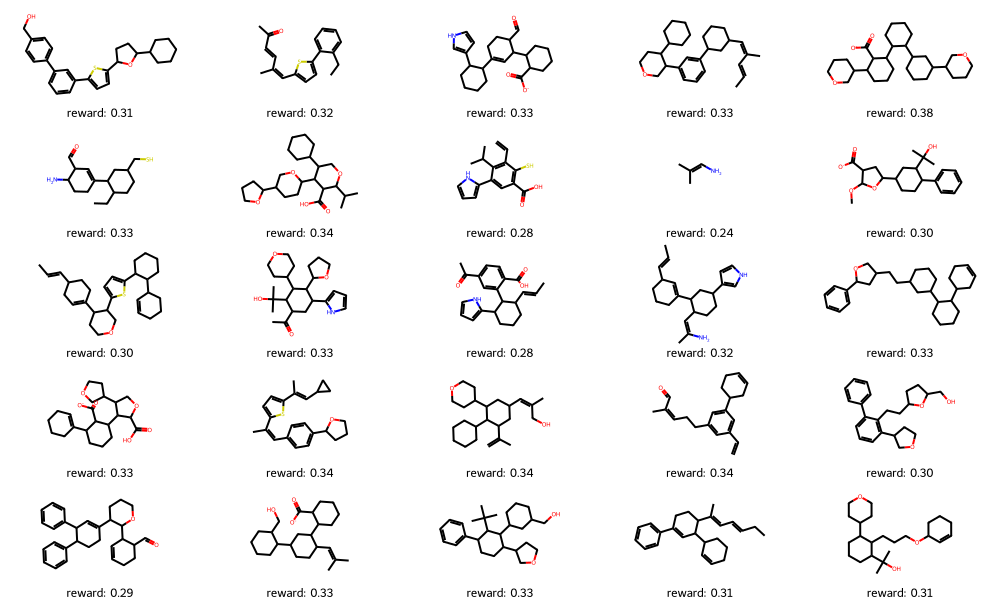

In [26]:
# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trial.task.compute_obj_properties(objs)
log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
index = 0
rewards = []
for i in is_valid:
    if i:
        rewards.append(list(log_rewards)[index])
        index += 1 
    else:
        rewards.append(-1)

MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' if r==-1 else f'reward: {r.exp().item():.2f}' for r in rewards[:25]])


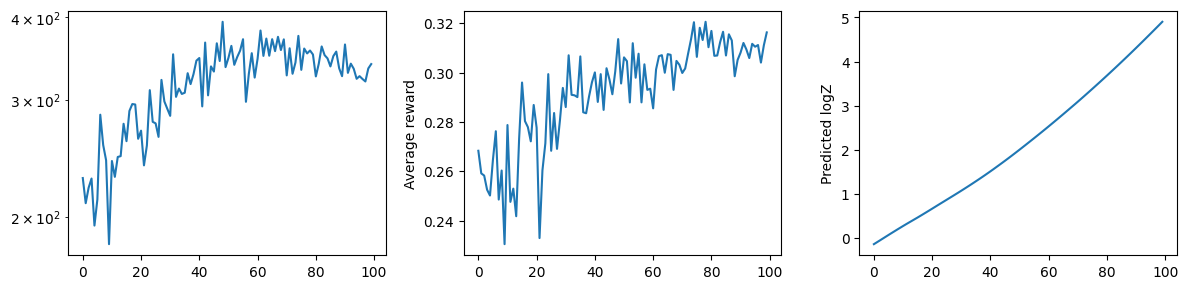

In [27]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0].set_yscale('log')
ax[1].set_ylabel('TB loss')
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[1].set_ylabel('Average reward')
ax[2].plot([i.value for i in ea.Scalars('train_logZ')])
ax[2].set_ylabel('Predicted logZ')
pp.tight_layout()

In [27]:
"""# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trial.task.compute_obj_properties(objs)
log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
index = 0
rewards = []
for i in is_valid:
    if i:
        rewards.append(list(log_rewards)[index])
        index += 1 
    else:
        rewards.append(-1)

MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' if r==-1 else f'reward: {r.exp().item():.2f}' for r in rewards[:25]])"""

"# Generate molecules\ntrajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)\nobjs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]\nobj_props, is_valid = trial.task.compute_obj_properties(objs)\nlog_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)\nindex = 0\nrewards = []\nfor i in is_valid:\n    if i:\n        rewards.append(list(log_rewards)[index])\n        index += 1 \n    else:\n        rewards.append(-1)\n\nMolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' if r==-1 else f'reward: {r.exp().item():.2f}' for r in rewards[:25]])"